In [2]:
import os
import pandas as pd
import numpy as np
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D, Activation
from keras.preprocessing.image import load_img, img_to_array
import cv2
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


In [4]:
TRAIN_DIR = "train"
TEST_DIR = "test"
INPUT_SIZE = (64, 64)
mapping = {'cat': 0, 'dog': 1}

cat_paths = []
dog_paths = []

for r, d, f in os.walk(TRAIN_DIR):
    for file in f:
        if "cat" in file:
            cat_paths.append(os.path.join(r, file))
        else:
            dog_paths.append(os.path.join(r, file))

test_paths = [os.path.join(TEST_DIR, file) for file in os.listdir(TEST_DIR)]

train_paths = cat_paths[:1000] + dog_paths[:1000]
random.shuffle(train_paths)
test_paths = test_paths[:20]

In [5]:
print('Total samples for train: ', len(train_paths))
print('Total samples for test: ', len(test_paths))

Total samples for train:  2000
Total samples for test:  20


In [6]:
# load in images
# resize to input size and normalize to 0 - 1
x_train = []
x_test = []
y_train = []
y_test = []

for i in range(len(test_paths)):
    imgpath = test_paths[i]
    img = cv2.imread(imgpath)
    img = cv2.resize(img, INPUT_SIZE) # resize
    img = img.astype('float32') / 255.0
    x_test.append(img)
    if "cat" in imgpath:
        y_test.append(mapping['cat'])
    else:
        y_test.append(mapping['dog'])

print('Shape of test images: ', x_test[0].shape)

for i in range(len(train_paths)):
    imgpath = train_paths[i]
    img = cv2.imread(imgpath)
    img = cv2.resize(img, INPUT_SIZE) # resize
    img = img.astype('float32') / 255.0
    x_train.append(img)
    if "cat" in imgpath:
        y_train.append(mapping['cat'])
    else:
        y_train.append(mapping['dog'])

print('Shape of train images: ', x_train[0].shape)

Shape of test images:  (64, 64, 3)
Shape of train images:  (64, 64, 3)


In [7]:
np.save('prepared data/x_train.npy', x_train)
np.save('prepared data/y_train.npy', y_train)
np.save('prepared data/x_test.npy', x_test)
np.save('prepared data/y_test.npy', y_test)

In [14]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [17]:
x_train = np.load('prepared data/x_train.npy')
y_train = np.load('prepared data/y_train.npy')

In [19]:
model.fit(x_train, y_train, 
        batch_size=16,
        epochs=30,
        validation_split = 0.2)

Train on 1600 samples, validate on 400 samples
Epoch 1/30
1600/1600 [==============================] - 7s 4ms/step - loss: 0.6907 - acc: 0.5344 - val_loss: 0.6906 - val_acc: 0.4850
Epoch 2/30
1600/1600 [==============================] - 7s 4ms/step - loss: 0.6859 - acc: 0.5725 - val_loss: 0.6589 - val_acc: 0.6575
Epoch 3/30
1600/1600 [==============================] - 7s 4ms/step - loss: 0.6490 - acc: 0.6225 - val_loss: 0.6282 - val_acc: 0.6325
Epoch 4/30
1600/1600 [==============================] - 7s 4ms/step - loss: 0.6071 - acc: 0.6656 - val_loss: 0.6206 - val_acc: 0.6675
Epoch 5/30
1600/1600 [==============================] - 7s 4ms/step - loss: 0.5820 - acc: 0.7025 - val_loss: 0.5660 - val_acc: 0.7125
Epoch 6/30
1600/1600 [==============================] - 7s 4ms/step - loss: 0.5312 - acc: 0.7344 - val_loss: 0.5965 - val_acc: 0.7125
Epoch 7/30
1600/1600 [==============================] - 7s 4ms/step - loss: 0.5025 - acc: 0.7575 - val_loss: 0.5633 - val_acc: 0.7025
Epoch 8/30
1600

In [20]:
model.save('CatDogNet.h5')

In [5]:
loaded_model = load_model('CatDogNet.h5')

x_test = np.load('prepared data/x_test.npy')
y_test = np.load('prepared data/y_test.npy')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


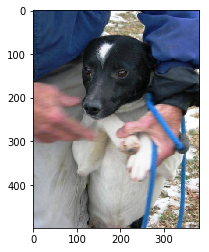

cat


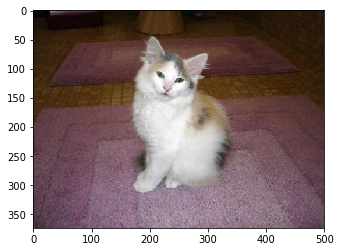

dog


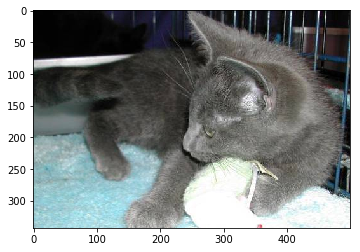

cat


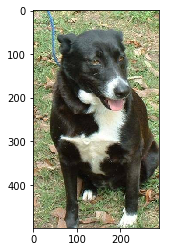

dog


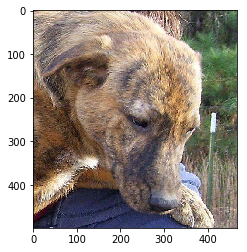

dog


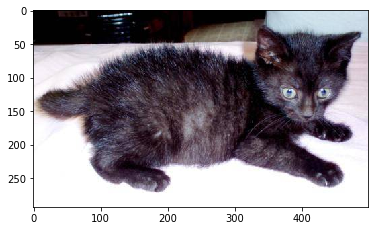

cat


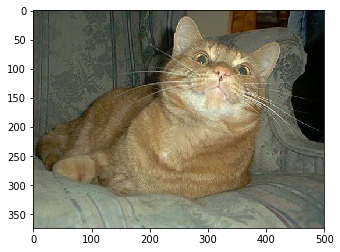

cat


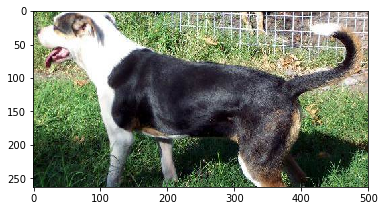

dog


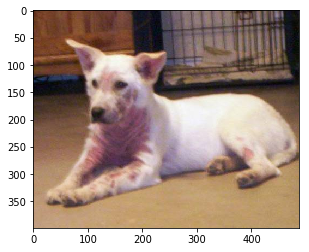

dog


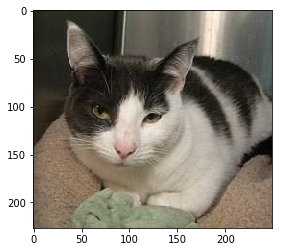

cat


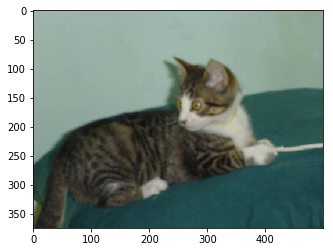

cat


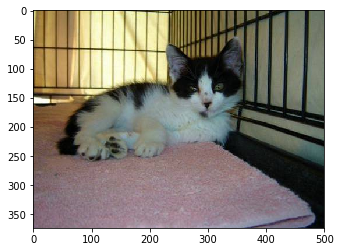

dog


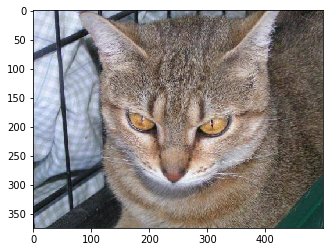

cat


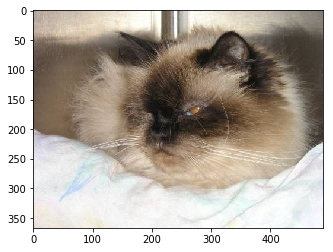

cat


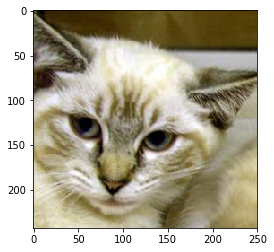

dog


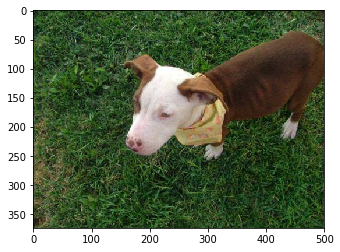

dog


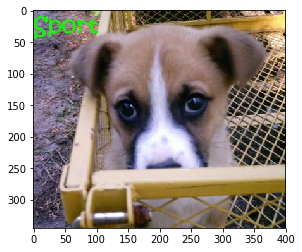

dog


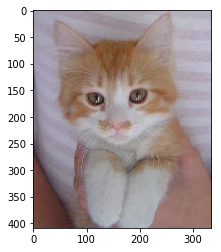

cat


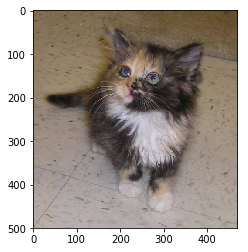

dog


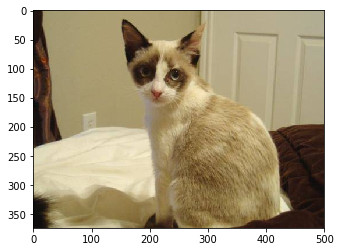

cat


In [22]:
predictions = loaded_model.predict(x_test)
    
for i in range(len(test_paths)):
    img = mpimg.imread(test_paths[i])
    imgplot = plt.imshow(img)
    plt.show()
    prediction = round(predictions[i][0])
    print(list(mapping.keys())[list(mapping.values()).index(prediction)])
    